In [1]:
# Allow user to enter a partial string for team name. If that partial string is there, return the closest actual name in the dataset as the variable and input that into the df_activeteam433, 352, or 442 

# Resources:
#### Removing spaces from column names:
https://www.geeksforgeeks.org/remove-spaces-from-column-names-in-pandas/

#### Select subset of dataframe:
https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

#### Subsetting dataframe based on conditions:
https://www.geeksforgeeks.org/selecting-rows-in-pandas-dataframe-based-on-conditions/

#### Return certain columns in a dataframe:
https://sparkbyexamples.com/pandas/pandas-select-columns-by-name-or-index/

#### Combine multiple dataframes into one:
https://www.geeksforgeeks.org/how-to-stack-multiple-pandas-dataframes/

#### MPL Soccer documentation:
https://mplsoccer.readthedocs.io/en/latest/index.html

#### Selecting subset of dataframe:
https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#:~:text=To%20select%20a%20single%20column,of%20the%20column%20of%20interest.

#### Count occurences of True and False in dataframe:
https://stackoverflow.com/questions/53550988/count-occurrences-of-false-or-true-in-a-column-in-pandas

#### Plot dataframe:
https://datatofish.com/plot-dataframe-pandas/

#### Set background color for plots:
https://www.geeksforgeeks.org/how-to-set-plot-background-color-in-matplotlib/

#### Changing Jupyter theme:
https://stackoverflow.com/questions/46510192/change-the-theme-in-jupyter-notebook

#### Terminal code to get toolbar back after changing theme:
https://stackoverflow.com/questions/56044487/toolbar-not-visible-after-setting-jupyter-notebook-theme

#### Jupyter theme options:
https://towardsdatascience.com/customize-your-jupyter-notebook-theme-in-2-lines-of-code-fc726cea1513

#### Add data labels to Python scatter:
https://towardsdatascience.com/how-to-add-text-labels-to-scatterplot-in-matplotlib-seaborn-ec5df6afed7a

#### Using where function to replace dataframe column values:
https://pythonexamples.org/pandas-dataframe-replace-values-in-column-based-on-condition/

#### Python operators:
https://www.w3schools.com/python/python_operators.asp

#### Exit Python script based on conditional:
https://stackoverflow.com/questions/179369/how-do-i-abort-the-execution-of-a-python-script

#### Taking user input for a value:
https://www.geeksforgeeks.org/taking-input-in-python/

#### See variable type:
https://www.simplilearn.com/tutorials/python-tutorial/python-typeof-function#:~:text=To%20determine%20the%20type%20of,class%20type%20of%20the%20object.

# Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# MPL Soccer is used to plot a soccer field
import mplsoccer
# Sys is used to exit the code given a conditional statement
import sys

# Read in and clean FIFA 23 data

In [3]:
# Read data in csv format
data = pd.read_csv(r'/Users/robertbanks/Desktop/Projects/SoccerAnalysis/FIFA_23_Data.csv')

# Replace spaces in column names with "_"
data.columns = data.columns.str.replace(' ','_')

# Change values in data where "Club_Position" is "SUB" or "RES" to the value in the "Best_Position" column
# Initially, only 11 players in each team were given actual positions and the rest were put on the bench
# We want all players to have a position so we could potential choose any of them

# Converting the best position column in the data into an array
# Replacing "SUB" and "RES" for each row where this is true with the best position from the best position array
bestposition = data['Best_Position'].to_numpy()
data['Club_Position'].where(~((data['Club_Position']=='SUB')|(data['Club_Position']=='RES')),other=bestposition,inplace=True)

# Printing data to test that this worked
# Successful if the positions of the top players are all correct and if the lowest rated players have positions
# data[['Known_As','Club_Position']]

# Creating boolean columns for each position group in the main dataset 

data['Goalkeeper'] = np.where(data['Club_Position']=='GK',True,False)
data['Center_Back'] = np.where(data['Club_Position']=='CB',True,False)
data['Left_Back'] = np.where(((data['Club_Position']=='LWB')|(data['Club_Position']=='LB')),True,False)
data['Right_Back'] = np.where(((data['Club_Position']=='RWB')|(data['Club_Position']=='RB')),True,False)
data['Center_Midfielder'] = np.where(((data['Club_Position']=='CM')|(data['Club_Position']=='CDM')|(data['Club_Position']=='CAM')),True,False)
data['Winger'] = np.where(((data['Club_Position']=='RW')|(data['Club_Position']=='LW')|(data['Club_Position']=='RM')|(data['Club_Position']=='LM')),True,False)
data['Striker'] = np.where(((data['Club_Position']=='ST')|(data['Club_Position']=='CF')),True,False)


# Ask for user inputs for team and formation
# Continue with the code if that team name is present in the data

In [5]:
#List of teams in data for reference 
#teams = data['Club_Name'].to_numpy()
#teams[0:1000]

# Prompting the user for team input
teaminput = input("What team would you like to plot?\n")

# Prompts for formation if team name is in data
# Returns error if team name is not in data
if data['Club_Name'].eq(teaminput).any() == True:
    print("Thanks for entering a team!")
    formationinput = input("What formation would you like to plot? Type 433, 442, or 352 please.\n")

else: 
    sys.exit("The team you entered is not a valid team name. Consider capitalizaiton, spelling, and special characters. Please enter a new team name.")
    
    
# Assigns values to position group variables depending on formationinput value

if formationinput == '433':
    gk = 1
    cb = 2
    lb = 1
    rb = 1
    cm = 3
    wing = 2
    st = 1
elif formationinput == '442':
    gk = 1
    cb = 2
    lb = 1
    rb = 1
    cm = 2
    wing = 3
    st = 1
elif formationinput == '352':
    gk = 1
    cb = 3
    lb = 1
    rb = 1
    cm = 3
    wing = 1
    st = 1
else:
    sys.exit("Invalid formation. Please rerun the cell and enter either 433, 442, or 352.")
    

What team would you like to plot?
Manchester City
Thanks for entering a team!
What formation would you like to plot? Type 433, 442, or 352 please.
442


# For a given club, subset the data for that club and return certain columns


In [6]:
def club_subset(club):
    df = data.loc[data['Club_Name'] == club][['Known_As','Club_Jersey_Number','Overall','Goalkeeper','Center_Back','Left_Back','Right_Back','Center_Midfielder','Winger','Striker']]
    return df


# Set active team below!

#### We are setting an active team using the above cllub_subset function. This active team dataframe known as "df_activeteam" is called in the functions below.

In [7]:
df_activeteam = club_subset(teaminput)

# Create functions to return counts of certain position groups

In [8]:
# Functions to find "count" number of players for the active team for each position group
def goalkeepers(count):
    gk = df_activeteam[df_activeteam['Goalkeeper']].iloc[:count] 
    return gk

def centerbacks(count):
    cb = df_activeteam[df_activeteam['Center_Back']].iloc[:count]
    return cb 

def leftbacks(count):
    lb = df_activeteam[df_activeteam['Left_Back']].iloc[:count]
    return lb

def rightbacks(count):
    rb = df_activeteam[df_activeteam['Right_Back']].iloc[:count]
    return rb

def centermidfielders(count):
    cm = df_activeteam[df_activeteam['Center_Midfielder']].iloc[:count]
    return cm

def wingers(count):
    wing = df_activeteam[df_activeteam['Winger']].iloc[:count]
    return wing

def strikers(count):
    st = df_activeteam[df_activeteam['Striker']].iloc[:count]
    return st


# Enter the number of players in each position group you want to plot

In [9]:
# Select how many players in each position group we will plot based on the if statement in the user inputs section
a = goalkeepers(gk)
b = centerbacks(cb)
c = leftbacks(lb)
d = rightbacks(rb)
e = centermidfielders(cm)
f = wingers(wing)
g = strikers(st)

# Combine the selected rows into one dataframe called formation

In [10]:
# Creating formation dataframe which combines the above variables and print output
formation = pd.concat([a, b, c, d, e, f, g], ignore_index = True, axis = 0)
formation[['Known_As','Overall','Goalkeeper', 'Center_Back', 'Left_Back','Right_Back','Center_Midfielder','Winger','Striker']]

a_count = formation.Goalkeeper.sum()
b_count = formation.Center_Back.sum()
c_count = formation.Left_Back.sum()
d_count = formation.Right_Back.sum()
e_count = formation.Center_Midfielder.sum()
f_count = formation.Winger.sum()
g_count = formation.Striker.sum()

print("Position Counts for Active Team:")
print("Goalkeepers:         ", a_count)
print("Center Backs:        ", b_count)
print("Left Backs:          " , c_count)
print("Right Backs:         ", d_count)
print("Center Midfielders:  ", e_count)
print("Wingers:             ", f_count)
print("Strikers:            ", g_count)

Position Counts for Active Team:
Goalkeepers:          1
Center Backs:         2
Left Backs:           1
Right Backs:          1
Center Midfielders:   2
Wingers:              3
Strikers:             1


# Error message in case the number of players selected does not equal 11

In [11]:
# There are 11 players on the field at a time, so we need to have 11 points to plot any soccer formation correctly

total_count = a_count + b_count + c_count + d_count + e_count + f_count + g_count

if total_count != 11 | a_count != 1:
    sys.exit("You have not selected 11 players, or have the wrong number of goalkeepers. Change your selection and rerun.")
    


## Plotting a soccer field with a given formation for the active team

Names and Numbers for Active Team:
Ederson 31
Rúben Dias 3
A. Laporte 14
João Cancelo 7
K. Walker 2
K. De Bruyne 17
Rodri 16
Bernardo Silva 20
R. Mahrez 26
P. Foden 47
E. Haaland 9


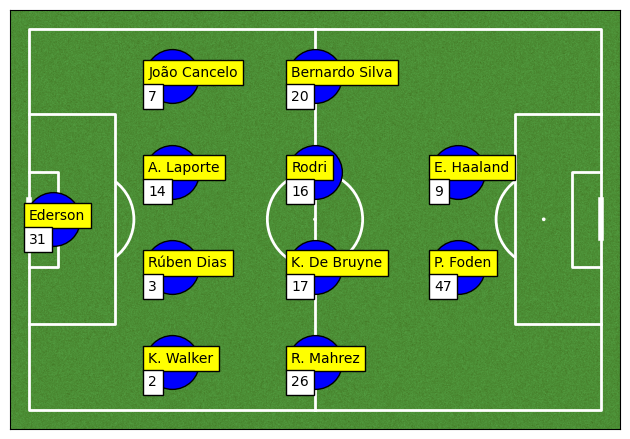

In [12]:
# Plot of the soccer field given a 433 is selected
if a_count == 1 and b_count == 2 and c_count == 1 and d_count == 1 and e_count == 3 and f_count == 2 and g_count == 1:
    
    # Assigning x and y coordinates to the active team based on the player positions selected
    formation['xcoordinate'] = [5, 30, 30, 30, 30, 60, 60, 60, 90, 90, 90]
    formation['ycoordinate'] = [40, 50, 30, 70, 10, 20, 40, 60, 20, 60, 40]

    # Preparing printed output of each player's name and number
    player1_name = formation.iloc[0][0:2]
    player2_name = formation.iloc[1][0:2]
    player3_name = formation.iloc[2][0:2]
    player4_name = formation.iloc[3][0:2]
    player5_name = formation.iloc[4][0:2]
    player6_name = formation.iloc[5][0:2]
    player7_name = formation.iloc[6][0:2]
    player8_name = formation.iloc[7][0:2]
    player9_name = formation.iloc[8][0:2]
    player10_name = formation.iloc[9][0:2]
    player11_name = formation.iloc[10][0:2]

    print("Names and Numbers for Active Team:")
    print(player1_name[0], player1_name[1])
    print(player2_name[0], player2_name[1])
    print(player3_name[0], player3_name[1])
    print(player4_name[0], player4_name[1])
    print(player5_name[0], player5_name[1])
    print(player6_name[0], player6_name[1])
    print(player7_name[0], player7_name[1])
    print(player8_name[0], player8_name[1])
    print(player9_name[0], player9_name[1])
    print(player10_name[0], player10_name[1])
    print(player11_name[0], player11_name[1])
    

    # Plotting the soccer field with above assigned coordinates for the selected formation
    from mplsoccer.pitch import Pitch
    pitch = Pitch(pitch_color = 'grass',line_color = 'white', stripe = False, axis = True, label = False, tick = False)
    fig, ax = pitch.draw()
    plt.scatter(formation['xcoordinate'], formation['ycoordinate'], color='blue', edgecolor='black', s=1500)

    # Goalkeeper data labels
    plt.text(x=0, y=40, s=player1_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=0, y=45, s=player1_name[1], bbox = dict(facecolor='white'))

    # Defender data labels
    plt.text(x=25, y=50, s=player2_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=25, y=55, s=player2_name[1], bbox = dict(facecolor='white'))

    plt.text(x=25, y=30, s=player3_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=25, y=35, s=player3_name[1], bbox = dict(facecolor='white'))

    plt.text(x=25, y=10, s=player4_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=25, y=15, s=player4_name[1], bbox = dict(facecolor='white'))

    plt.text(x=25, y=70, s=player5_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=25, y=75, s=player5_name[1], bbox = dict(facecolor='white'))

    # Midfielder data labels
    plt.text(x=55, y=20, s=player6_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=55, y=25, s=player6_name[1], bbox = dict(facecolor='white'))

    plt.text(x=55, y=40, s=player7_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=55, y=45, s=player7_name[1], bbox = dict(facecolor='white'))

    plt.text(x=55, y=60, s=player8_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=55, y=65, s=player8_name[1], bbox = dict(facecolor='white'))

    # Forward data labels
    plt.text(x=85, y=20, s=player9_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=85, y=25, s=player9_name[1], bbox = dict(facecolor='white'))

    plt.text(x=85, y=60, s=player10_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=85, y=65, s=player10_name[1], bbox = dict(facecolor='white'))

    plt.text(x=85, y=40, s=player11_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=85, y=45, s=player11_name[1], bbox = dict(facecolor='white'))
    
# Plot soccer field given a 442 is selected
elif a_count == 1 and b_count == 2 and c_count == 1 and d_count == 1 and e_count == 2 and f_count == 3 and g_count == 1: 

     # Assigning x and y coordinates to the active team based on the player positions selected
    formation['xcoordinate'] = [5, 30, 30, 30, 30, 60, 60, 60, 60, 90, 90]
    formation['ycoordinate'] = [40, 50, 30, 70, 10, 50, 30, 70, 10, 30, 50]
    
     # Preparing printed output of each player's name and number
    player1_name = formation.iloc[0][0:2]
    player2_name = formation.iloc[1][0:2]
    player3_name = formation.iloc[2][0:2]
    player4_name = formation.iloc[3][0:2]
    player5_name = formation.iloc[4][0:2]
    player6_name = formation.iloc[5][0:2]
    player7_name = formation.iloc[6][0:2]
    player8_name = formation.iloc[7][0:2]
    player9_name = formation.iloc[8][0:2]
    player10_name = formation.iloc[9][0:2]
    player11_name = formation.iloc[10][0:2]
    
    print("Names and Numbers for Active Team:")
    print(player1_name[0], player1_name[1])
    print(player2_name[0], player2_name[1])
    print(player3_name[0], player3_name[1])
    print(player4_name[0], player4_name[1])
    print(player5_name[0], player5_name[1])
    print(player6_name[0], player6_name[1])
    print(player7_name[0], player7_name[1])
    print(player8_name[0], player8_name[1])
    print(player9_name[0], player9_name[1])
    print(player10_name[0], player10_name[1])
    print(player11_name[0], player11_name[1])

    from mplsoccer.pitch import Pitch
    pitch = Pitch(pitch_color = 'grass',line_color = 'white', stripe = False, axis = True, label = False, tick = False)
    fig, ax = pitch.draw()
    plt.scatter(formation['xcoordinate'], formation['ycoordinate'], color='blue', edgecolor='black', s=1500)

    # Goalkeeper data labels
    plt.text(x=0, y=40, s=player1_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=0, y=45, s=player1_name[1], bbox = dict(facecolor='white'))

    # Defender data labels
    plt.text(x=25, y=50, s=player2_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=25, y=55, s=player2_name[1], bbox = dict(facecolor='white'))

    plt.text(x=25 , y=30, s=player3_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=25 , y=35, s=player3_name[1], bbox = dict(facecolor='white'))

    plt.text(x=25, y=10, s=player4_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=25, y=15, s=player4_name[1], bbox = dict(facecolor='white'))

    plt.text(x=25, y=70, s=player5_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=25, y=75, s=player5_name[1], bbox = dict(facecolor='white'))

    # Midfielder data labels
    plt.text(x=55, y=50, s=player6_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=55 , y=55, s=player6_name[1], bbox = dict(facecolor='white'))

    plt.text(x=55, y=30, s=player7_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=55 , y=35, s=player7_name[1], bbox = dict(facecolor='white'))

    plt.text(x=55, y=10, s=player8_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=55 , y=15, s=player8_name[1], bbox = dict(facecolor='white'))

    plt.text(x=55, y=70, s=player9_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=55 , y=75, s=player9_name[1], bbox = dict(facecolor='white'))

    # Forward data labels
    plt.text(x=85, y=50, s=player10_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=85 , y=55, s=player10_name[1], bbox = dict(facecolor='white'))

    plt.text(x=85, y=30, s=player11_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=85 , y=35, s=player11_name[1], bbox = dict(facecolor='white'))
    
# Plot soccer field given a 352 is selected
elif a_count == 1 and b_count == 3 and c_count == 1 and d_count == 1 and e_count == 3 and f_count == 1 and g_count == 1: 

     # Assigning x and y coordinates to the active team based on the player positions selected
    formation['xcoordinate'] = [5, 30, 30, 30, 60, 60, 60, 60, 60, 90, 90]
    formation['ycoordinate'] = [40, 40, 20, 60, 70, 10, 55, 40, 25, 30, 50]
    
     # Preparing printed output of each player's name and number
    player1_name = formation.iloc[0][0:2]
    player2_name = formation.iloc[1][0:2]
    player3_name = formation.iloc[2][0:2]
    player4_name = formation.iloc[3][0:2]
    player5_name = formation.iloc[4][0:2]
    player6_name = formation.iloc[5][0:2]
    player7_name = formation.iloc[6][0:2]
    player8_name = formation.iloc[7][0:2]
    player9_name = formation.iloc[8][0:2]
    player10_name = formation.iloc[9][0:2]
    player11_name = formation.iloc[10][0:2]
    
    print("Names and Numbers for Active Team:")
    print(player1_name[0], player1_name[1])
    print(player2_name[0], player2_name[1])
    print(player3_name[0], player3_name[1])
    print(player4_name[0], player4_name[1])
    print(player5_name[0], player5_name[1])
    print(player6_name[0], player6_name[1])
    print(player7_name[0], player7_name[1])
    print(player8_name[0], player8_name[1])
    print(player9_name[0], player9_name[1])
    print(player10_name[0], player10_name[1])
    print(player11_name[0], player11_name[1])

    from mplsoccer.pitch import Pitch
    pitch = Pitch(pitch_color = 'grass',line_color = 'white', stripe = False, axis = True, label = False, tick = False)
    fig, ax = pitch.draw()
    plt.scatter(formation['xcoordinate'], formation['ycoordinate'], color='blue', edgecolor='black', s=1500)

    # Goalkeeper data labels
    plt.text(x=0, y=40, s=player1_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=0, y=45, s=player1_name[1], bbox = dict(facecolor='white'))

    # Defender data labels
    plt.text(x=25, y=40, s=player2_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=25, y=45, s=player2_name[1], bbox = dict(facecolor='white'))

    plt.text(x=25 , y=20, s=player3_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=25 , y=25, s=player3_name[1], bbox = dict(facecolor='white'))

    plt.text(x=25, y=60, s=player4_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=25, y=65, s=player4_name[1], bbox = dict(facecolor='white'))
    
    # Midfielder data labels
    plt.text(x=55, y=10, s=player5_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=55, y=15, s=player5_name[1], bbox = dict(facecolor='white'))

    plt.text(x=55, y=70, s=player6_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=55 , y=75, s=player6_name[1], bbox = dict(facecolor='white'))

    plt.text(x=55, y=40, s=player7_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=55 , y=45, s=player7_name[1], bbox = dict(facecolor='white'))

    plt.text(x=55, y=25, s=player8_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=55 , y=30, s=player8_name[1], bbox = dict(facecolor='white'))

    plt.text(x=55, y=55, s=player9_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=55 , y=60, s=player9_name[1], bbox = dict(facecolor='white'))

    # Forward data labels
    plt.text(x=85, y=50, s=player10_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=85 , y=55, s=player10_name[1], bbox = dict(facecolor='white'))

    plt.text(x=85, y=30, s=player11_name[0], bbox = dict(facecolor='yellow'))
    plt.text(x=85 , y=35, s=player11_name[1], bbox = dict(facecolor='white'))
    
else:
    print("Not available yet.")
    
